# TASK-2

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
%config InlineBackend.figure_format='retina'

## Q1


### Function for Decision Tree using sklearn

In [11]:
import joblib
import os

def DecisionTreeClassifierFunc(X_train,y_train,X_test,y_test,model_file_name):
    

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Define the model path within the specified folder
    model_path = os.path.join('./Task_2 Models files', model_file_name)
    # Save the model
    joblib.dump(model, model_path)
    print(f"Model saved to {model_path}")

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    activity_mapping = {
        1: 'LAYING',
        2: 'SITTING',
        3: 'STANDING',
        4: 'WALKING',
        5: 'WALKING DOWNSTAIRS',
        6: 'WALKING UPSTAIRS'
    }
    

    conf_matrix = confusion_matrix(y_test, y_pred)

   

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
     # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


### 2.1.1 Decision Tree Classification on Raw accelerometer dataset.

Model saved to ./Task_2 Models files\DecisionTree_Raw_acc.pkl
Accuracy: 0.6481
Precision: 0.6476
Recall: 0.6481


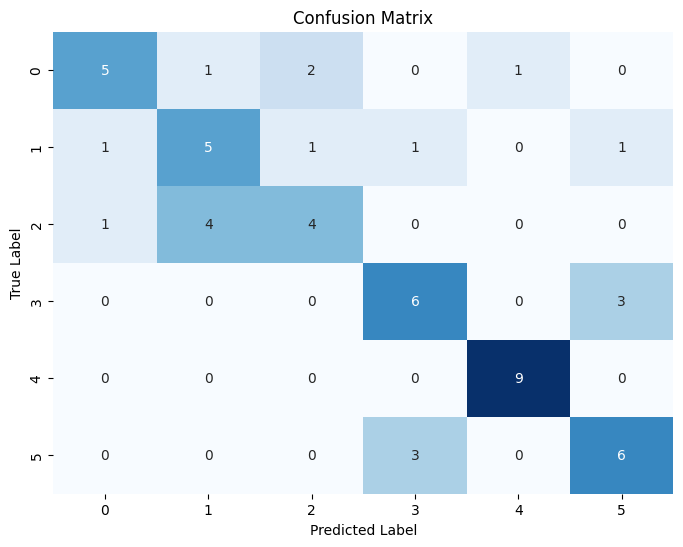

In [12]:
from HAR.MakeDataset import X_train, y_train, X_test,y_test

# accx^2 + accy^2+ accZ^2
X_train = np.square(X_train[:, :, 0]) + np.square(X_train[:, :, 1]) + np.square(X_train[:, :, 2])
y_train = np.reshape(y_train, (y_train.shape[0], 1))
X_test = np.square(X_test[:, :, 0]) + np.square(X_test[:, :, 1]) + np.square(X_test[:, :, 2])
y_test = np.reshape(y_test, (y_test.shape[0], 1))
X_train_raw = pd.DataFrame(X_train)
y_train_raw = pd.DataFrame(y_train)
X_test_raw = pd.DataFrame(X_test)
y_test_raw = pd.DataFrame(y_test)

DecisionTreeClassifierFunc(X_train_raw,y_train_raw,X_test_raw,y_test_raw,'DecisionTree_Raw_acc.pkl')

### 2.1.2 Decision Tree Classification on TSFEL feature dataset.

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
Model saved to ./Task_2 Models files\DecisionTree_TSFEL.pkl
Accuracy: 0.7037
Precision: 0.7008
Recall: 0.7037


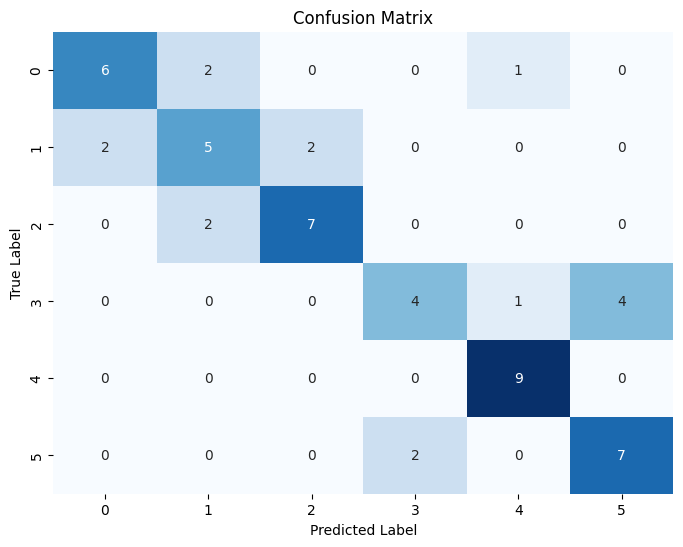

In [13]:
import tsfel

X_train_sig = list(X_train_raw.to_numpy())
X_test_sig = list(X_test_raw.to_numpy())


cfg_file = tsfel.get_features_by_domain()  # All features
# Get features
X_train_TSFEL = tsfel.time_series_features_extractor(cfg_file, X_train_sig, fs = 100)
X_test_TSFEL = tsfel.time_series_features_extractor(cfg_file, X_test_sig, fs = 100)

y_train_TSFEL = y_train_raw
y_test_TSFEL = y_test_raw


DecisionTreeClassifierFunc(X_train_TSFEL,y_train_TSFEL,X_test_TSFEL,y_test_TSFEL,'DecisionTree_TSFEL.pkl')

### 2.1.3 Decision Tree Classification on Feature dataset (X_train).

Model saved to ./Task_2 Models files\DecisionTree_X_train.pkl
Accuracy: 0.8622
Precision: 0.8633
Recall: 0.8622


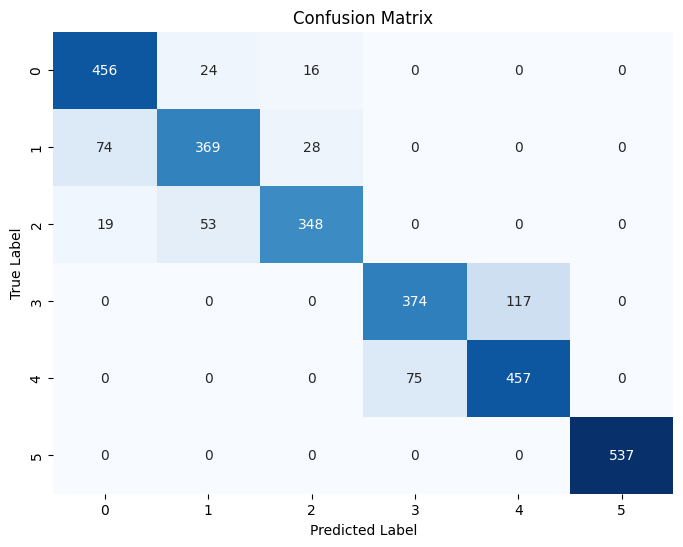

In [14]:
X_train = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "X_train.txt"), sep='\s+', header=None)
y_train = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)
X_test = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/test", "X_test.txt"), sep='\s+', header=None)
y_test = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/test", "y_test.txt"), sep='\s+', header=None)

DecisionTreeClassifierFunc(X_train,y_train,X_test,y_test,'DecisionTree_X_train.pkl')

### Q2.1.4

For the model trained on Raw Accelerometer data, the metrics are as follows:
<br>
Accuracy: 0.6481
<br>
Precision: 0.6476
<br>
Recall: 0.6481


For the model trained on TSFEL features, the metrics are as follows:
<br>
Accuracy: 0.7037
<br>
Precision: 0.7008
<br>
Recall: 0.7037


For the model trained on Feature dataset, the metrics are as follows:
<br>
Accuracy: **0.8622**
<br>
Precision: **0.8633**
<br>
Recall: **0.8622**


As you can see from the above data the **model trained on feature dataset is much better** compared to the model trained on raw accelerometer data or on TSFEL features  

## Q2

### Function for decision tree with death and accuracy plot

In [15]:
def DecisionTreeClassifierFunc(X_train, y_train, X_test, y_test, max_depth):
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def evaluate_depths(X_train, y_train, X_test, y_test, method_name):
    depths = range(2, 9)
    accuracies = []

    for depth in depths:
        accuracy = DecisionTreeClassifierFunc(X_train, y_train, X_test, y_test, max_depth=depth)
        accuracies.append(accuracy)
        print(f"{method_name} | Depth: {depth} | Accuracy: {accuracy:.4f}")

    return depths, accuracies

def plot_accuracies(depths, accuracies, method_name):
    plt.plot(depths, accuracies, marker='o', label=method_name)
    plt.xlabel('Tree Depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Accuracy vs Depth')
    plt.legend()

### Plot of accuracy of the model on test data vs the depth of the tree for **Raw Accelerometer data**

Raw Combined Signal | Depth: 2 | Accuracy: 0.4815
Raw Combined Signal | Depth: 3 | Accuracy: 0.5370
Raw Combined Signal | Depth: 4 | Accuracy: 0.5926
Raw Combined Signal | Depth: 5 | Accuracy: 0.6296
Raw Combined Signal | Depth: 6 | Accuracy: 0.6481
Raw Combined Signal | Depth: 7 | Accuracy: 0.6481
Raw Combined Signal | Depth: 8 | Accuracy: 0.6481


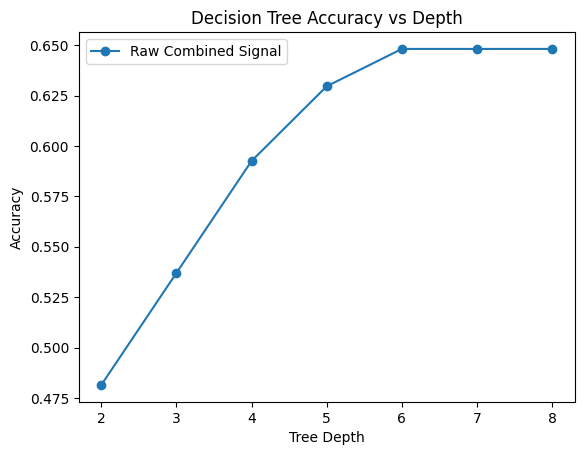

In [16]:
depths, accuracies = evaluate_depths(X_train_raw, y_train_raw, X_test_raw, y_test_raw, method_name="Raw Combined Signal")
plot_accuracies(depths, accuracies, "Raw Combined Signal")

### Plot of accuracy of the model on test data vs the depth of the tree for **TSFEL dataset**

TSFEL dataset | Depth: 2 | Accuracy: 0.5556
TSFEL dataset | Depth: 3 | Accuracy: 0.7407
TSFEL dataset | Depth: 4 | Accuracy: 0.6852
TSFEL dataset | Depth: 5 | Accuracy: 0.7037
TSFEL dataset | Depth: 6 | Accuracy: 0.7037
TSFEL dataset | Depth: 7 | Accuracy: 0.7037
TSFEL dataset | Depth: 8 | Accuracy: 0.7037


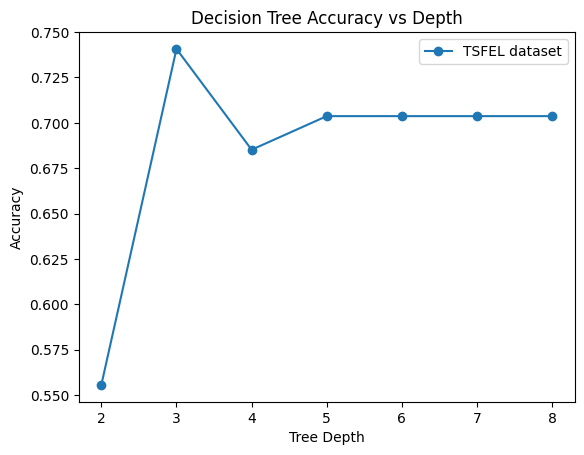

In [17]:
depths, accuracies = evaluate_depths(X_train_TSFEL, y_train_TSFEL, X_test_TSFEL, y_test_TSFEL, method_name="TSFEL dataset")
plot_accuracies(depths, accuracies, "TSFEL dataset")

### Plot of accuracy of the model on test data vs the depth of the tree for **Features dataset**

Features dataset | Depth: 2 | Accuracy: 0.4815
Features dataset | Depth: 3 | Accuracy: 0.5370
Features dataset | Depth: 4 | Accuracy: 0.5926
Features dataset | Depth: 5 | Accuracy: 0.6296
Features dataset | Depth: 6 | Accuracy: 0.6481
Features dataset | Depth: 7 | Accuracy: 0.6481
Features dataset | Depth: 8 | Accuracy: 0.6481


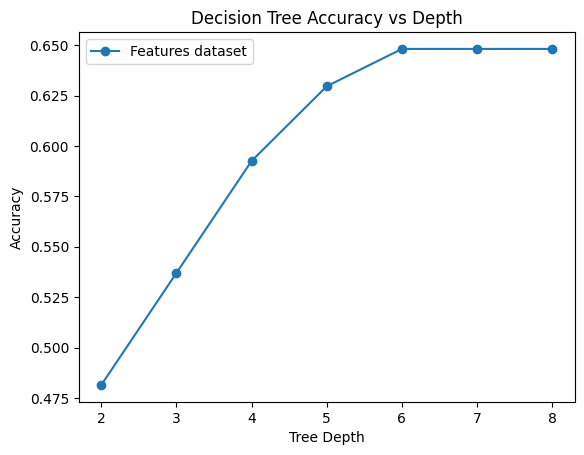

In [18]:
depths, accuracies = evaluate_depths(X_train_raw, y_train_raw, X_test_raw, y_test_raw, method_name="Features dataset")
plot_accuracies(depths, accuracies, "Features dataset")

## Q3
The Raw accelerometer model misclassified activities in static labels like laying, sitting, standing.
<br>
The TSFEL model classified the dynamic activities correctly but misclassified once in static activities.
<br>
On the other hand the Features model perfectly classified withing static and dynamic. It only misclassified the labels within static and dynamic a little
<br>